Make a filterbank with random numbers for testing

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from jess.calculators import to_dtype
from your import Your
from your.formats.filwriter import make_sigproc_object

%matplotlib inline

In [2]:
# 128 chans, 512 samples
nsamps = 512
nchans = 128
nbits = 8
out_file = "fake.fil"
rands = np.random.normal(size=nsamps * nchans).reshape(nsamps, nchans)

In [3]:
# add some bandpass effects
structure = np.sin(np.linspace(0, np.pi, nchans))
stds = 2 ** 3 * structure + 2 ** 2
bandpass = 2 ** 4 * structure + 2 ** 6

Text(0, 0.5, 'Samps')

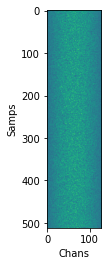

In [4]:
rands *= stds
rands += bandpass
rands = to_dtype(rands, np.uint8)
plt.imshow(rands)
plt.xlabel("Chans")
plt.ylabel("Samps")

In [5]:
# Write out as numpy  array
np.save("fake.npy", rands)

In [6]:
# Write out the fil
sigproc_object = make_sigproc_object(
    rawdatafile=out_file,
    source_name="fake",
    nchans=128,
    foff=1,  # MHz
    fch1=1400,  # MHz
    tsamp=0.000256,  # seconds
    tstart=59215,  # MJD
    # src_raj=yr_input.src_raj,  # HHMMSS.SS
    # src_dej=yr_input.src_dej,  # DDMMSS.SS
    machine_id=0,
    nbeams=1,
    # ibeam=yr_input.your_header.ibeam,
    nbits=8,
    # nifs=yr_input.your_header.nifs,
    # barycentric=yr_input.your_header.barycentric,
    # pulsarcentric=yr_input.your_header.pulsarcentric,
    # telescope_id=yr_input.your_header.telescope_id,
    # data_type=yr_input.your_header.data_type,
    # az_start=yr_input.your_header.az_start,
    # za_start=yr_input.your_header.za_start,
)
sigproc_object.write_header(out_file)

In [7]:
sigproc_object.append_spectra(rands, out_file)